# NLP Hotel review analysis
Benedikt Middelstaedt - 10 June 2024 - BrainStation Data Science & AI Bootcamp 
______________________________________________________________________________

## Table of content

1. Basic Setup
2. Introduction
3. Conclusion
4. Tasks

    4.1 Exploratory Data Analysis

    4.2 Preprocessing
    
    4.3 Logistic regression model

    4.4 PCA with a decision tree classifier

    4.5 In-depth evaluation

## 1. Basic setup

The Conda Environment plotly_bokeh with Python version 3.8.19 is used to process the project. Due to the size of the sklearn library, the corresponding module is loaded when required and not at the beginning.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




Allgemeine Einstellungen

In [27]:
pd.set_option('display.max_columns', None)

Folgende Funktionen werden im weiteren Verlauf benutzt: 

In [3]:
### Functions

Übersicht über die Benutzten Dataframes, wichtige Variablen und Zwischenergebnisse:

In [4]:
### dataframes, variables, and saved solutions

## 2. Introduction

Datensatz vom 3.8.2017 -

## 3. Conclusion

## 4. Hotel review analysis

The following is a step-by-step procedure for analysing the data set. 

### 4.1 Exploratory Data Analysis


This was followed by an initial overview of the data set in its raw form: 

Remark: 
In the first load, the column ‘Unnamed: 0’ appeared, this had the same information content as the index that Panda's read_csv automatically assigns.

It is possible to delete this. This can be used subsequently instead of the automatic index or the argument index_col = 0 can be included in the import of the file in order to use it immediately as an index.
As the removal is a one-off operation that leads to errors if repeated, index_col = 0 has been added at the top.

Source: 

https://stackoverflow.com/questions/36519086/how-to-get-rid-of-unnamed-0-column-in-a-pandas-dataframe-read-in-from-csv-fil

In [20]:
data_raw = pd.read_csv('../data/Hotel_Reviews.csv', index_col=0)
data_raw.head(2).T # T to get a better overview over the columns - the values matter less for now.

,0,1
Additional_Number_of_Scoring,194,194
Average_Score,7.7,7.7
Negative_Review,I am so angry that i made this post available...,No Negative
Review_Total_Negative_Word_Counts,397,0
Total_Number_of_Reviews,1403,1403
Positive_Review,Only the park outside of the hotel was beauti...,No real complaints the hotel was great great ...
Review_Total_Positive_Word_Counts,11,105
Total_Number_of_Reviews_Reviewer_Has_Given,7,7
Reviewer_Score,0,0
Days_Since_Review,0,0


Auf den ersten Blick besteht Unklarkeit über die Information in den Spalten. Zumnächst wird sich deshalb eine Übersicht zum genauen Verständnis des Daten verschafft.  

In [28]:
data_raw.sample(3)

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
74709,1195,8.3,Didn t know about breakfast was expensive got...,31,4684,Decor front desk were chatty and helpful,8,1,0,269,51.491374,-0.121419,7,11,2016,0,0,0,1,0,0,0,0,1,0,0,0,1,1
151468,42,9.0,No Negative,0,171,Welcoming great Food good Service excellent,7,1,0,176,48.869143,2.300653,8,2,2017,0,0,0,0,0,1,0,0,0,0,1,0,0,5
556,244,8.5,The toilet was too low to the floor The room ...,22,1831,The bed was very comfortable and the bathroom...,15,2,1,469,51.491888,-0.194971,21,4,2016,1,0,0,0,0,0,0,0,1,0,0,0,1,3


In [21]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515738 entries, 0 to 515737
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515738 non-null  int64  
 1   Average_Score                               515738 non-null  float64
 2   Negative_Review                             515738 non-null  object 
 3   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 4   Total_Number_of_Reviews                     515738 non-null  int64  
 5   Positive_Review                             515738 non-null  object 
 6   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 8   Reviewer_Score                              515738 non-null  int64  
 9   Days_Since_Review                           515738 non-null  int64  
 10  L

We have 515738 values in each column and there seems to be no NaN values or errors in the data type, the data type of the columns is the expected one.
In the dataset we have the following column categories:

1. review columns
2. hotel columns

and our target column (Pos 8) ‘Reviewer_Score’



For personal taste of the author, the columns in the dataframe are ordered from column 1 to column 30: 

Target:


 8   Reviewer_Score                             

Evaluation columns:              

 2   Negative_Review               
 3   Review_Total_Negative_Word_Counts               
 5   Positive_Review                
 6   Review_Total_Positive_Word_Counts   
 27  Leisure_Trip                                                              
 28  Nights_Stayed               
 9   Days_Since_Review               
 12  Day                                  
 13  Month      
 14  Year               
 0   Additional_Number_of_Scoring                  
 15  Reviewer_Nationality_Australia                             
 16  Reviewer_Nationality_Ireland                 
 17  Reviewer_Nationality_UAE                     
 18  Reviewer_Nationality_UK                       
 19  Reviewer_Nationality_USA                      
 20  Reviewer_Nationality_Other      
 7   Total_Number_of_Reviews_Reviewer_Has_Given                           

Hotel columns:

 1   Average_Score               
 4   Total_Number_of_Reviews               
 21  Hotel_Address_Amsterdam                                     
 22  Hotel_Address_Barcelona                  
 23  Hotel_Address_London                        
 24  Hotel_Address_Milan                           
 25  Hotel_Address_Paris                          
 26  Hotel_Address_Vienna                        
 10  Latitude                                    
 11  Longitude                                   



 


  

  





#### Unclear columns

The logic behind these columns is unclear at the beginning of the EDA, so they will be considered in detail.


 0   Additional_Number_of_Scoring                               
 2   Negative_Review              
 3   Review_Total_Negative_Word_Counts               
 5   Positive_Review                
 6   Review_Total_Positive_Word_Counts               
      

In [247]:
c = list(data_raw.columns)

In [59]:
c = list(data_raw.columns)
data_raw.loc[20003:20008, [c[8],c[0], c[2], c[3],c[5],c[6]]]

,Reviewer_Score,Additional_Number_of_Scoring,Negative_Review,Review_Total_Negative_Word_Counts,Positive_Review,Review_Total_Positive_Word_Counts
20003,0,788,Room was tighter than square footage would imply,9,Location,2
20004,1,788,Jacuzzi in spa was out of order,8,No Positive,0
20005,1,788,More information available about restaurents,6,Liked room facilities in bathroom enjoyed swi...,10
20006,1,788,We had to go home,7,Very helpful staff nothing was too much troub...,19
20007,0,788,Already complained to the hotel and booking c...,18,No Positive,0
20008,0,788,poor room service and attitude of staff,8,location and facilities excellent,5


Uncertainties:

- what is the meaning of column 0 Additional_Number_of_Scoring?                               
- why is the word count in column 2 Negative_Review not equal to 3 Review_Total_Negative_Word_Counts?     
- why is the word count in column 5 Positive_Review not equal to 6 Review_Total_Positive_Word_Counts?
     


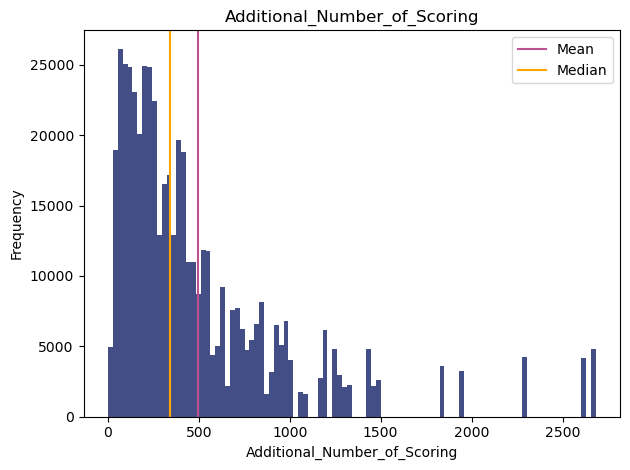

In [63]:
plt.figure()

plt.hist(data_raw['Additional_Number_of_Scoring'], bins= 100,color='#444e86')
plt.title('Additional_Number_of_Scoring')
plt.xlabel('Additional_Number_of_Scoring')
plt.ylabel('Frequency')
plt.axvline(data_raw['Additional_Number_of_Scoring'].mean(), c = '#bc5090', label = 'Mean')
plt.axvline(data_raw['Additional_Number_of_Scoring'].median(), c ='#ffa600', label = "Median")
plt.legend()

plt.tight_layout()
plt.show()

We simply regard the column as additional scoring information and stop the analysis at this point. 

In [70]:
data_raw.head(4)

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,52.360576,4.915968,3,8,2017,0,0,0,0,0,1,1,0,0,0,0,0,1,6
1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,52.360576,4.915968,3,8,2017,0,1,0,0,0,0,1,0,0,0,0,0,1,4
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,52.360576,4.915968,31,7,2017,1,0,0,0,0,0,1,0,0,0,0,0,1,3
3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,52.360576,4.915968,31,7,2017,0,0,0,1,0,0,1,0,0,0,0,0,1,3


In [208]:
#Testing the negative reviews

import string
random_test = list(np.random.choice(range(1, 515737), size=35, replace=False))

for i in random_test:
    s1 = data_raw.loc[i,['Negative_Review']].item()
    if len(s1.split(' ')) == data_raw.loc[i,['Review_Total_Negative_Word_Counts']].item():
        continue # skip columns with a review or no difference between count and sentence 
    else:
        a = len(s1.split(' '))-data_raw.loc[i,['Review_Total_Negative_Word_Counts']].item()
        value = data_raw.loc[i,['Negative_Review']].item()
        print(f'subtraction: {a} and value: {value}')



subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative
subtraction: 2 and value: No Negative


The column ‘Review_Total_Negative_Word_Counts’ counts the number of values: The expression No Negative means that no negative comment was entered in the questionnaire. 

In [209]:
# sanity check fpr Positive_review

random_test = list(np.random.choice(range(1, 515737), size=35, replace=False))

for i in random_test:
    s1 = data_raw.loc[i,['Positive_Review']].item()
    if len(s1.split(' ')) == data_raw.loc[i,['Review_Total_Positive_Word_Counts']].item():
        continue
    else:
        a = len(s1.split(' '))-data_raw.loc[i,['Review_Total_Positive_Word_Counts']].item()
        value = data_raw.loc[i,['Positive_Review']].item()
        print(f'subtraction: {a} and value: {value}')

subtraction: 2 and value: No Positive
subtraction: 2 and value: No Positive
subtraction: 2 and value: No Positive
subtraction: 2 and value: No Positive
subtraction: 2 and value: No Positive


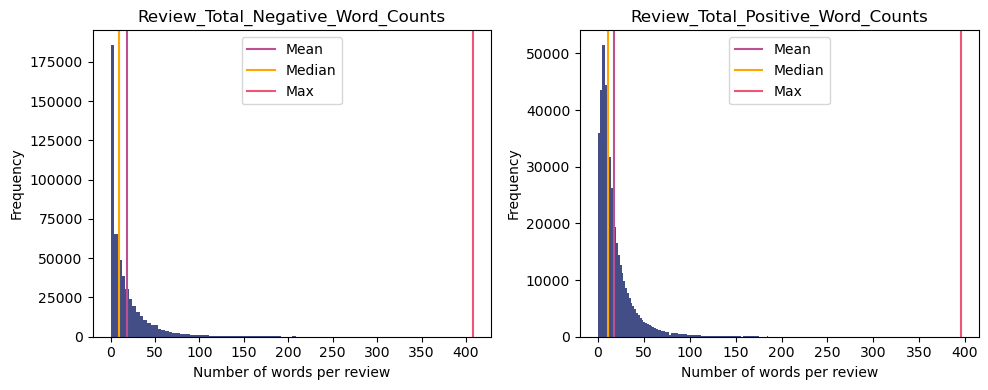

number of no negative/ empty text fields reviews: 127890, number of no positive/ empty text fields reviews: 35946


In [239]:

a = (data_raw['Review_Total_Negative_Word_Counts']== 0).sum()
b = (data_raw['Review_Total_Positive_Word_Counts']== 0).sum()

plt.subplots(1,2, figsize = (10,4))

plt.subplot(1,2,1)
plt.hist(data_raw['Review_Total_Negative_Word_Counts'], bins= 100,color='#444e86')
plt.title('Review_Total_Negative_Word_Counts')
plt.xlabel('Number of words per review')
plt.axvline(data_raw['Review_Total_Negative_Word_Counts'].mean(), c = '#bc5090', label = 'Mean')
plt.axvline(data_raw['Review_Total_Negative_Word_Counts'].median(), c ='#ffa600', label = "Median")
plt.axvline(data_raw['Review_Total_Negative_Word_Counts'].max(),c ='#ef5675', label = 'Max')
plt.ylabel('Frequency')
plt. legend(loc='upper center')

plt.subplot(1,2,2)
plt.hist(data_raw['Review_Total_Positive_Word_Counts'], bins= 200,color='#444e86')
plt.title('Review_Total_Positive_Word_Counts')
plt.xlabel('Number of words per review')
plt.axvline(data_raw['Review_Total_Positive_Word_Counts'].mean(), c = '#bc5090', label = 'Mean')
plt.axvline(data_raw['Review_Total_Positive_Word_Counts'].median(), c ='#ffa600', label = "Median")
plt.axvline(data_raw['Review_Total_Positive_Word_Counts'].max(),c ='#ef5675', label = 'Max')
plt.ylabel('Frequency')

plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

print(f'number of no negative/ empty text fields reviews: {a}, number of no positive/ empty text fields reviews: {b}')


We can conclude from this that the willingness to make a written statement is higher when positive feedback is given. In the case of negative feedback, more precise details are often not given. 

The connection between text and Review_Total_Negative/Positve_Word_Counts and Positive/Negative_Review is clear, the confusion was caused by the statement No Negative/No Positive.

#### Creating of the clean dataframe

In [249]:
print(c)

['Additional_Number_of_Scoring', 'Average_Score', 'Negative_Review', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Positive_Review', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Days_Since_Review', 'Latitude', 'Longitude', 'Day', 'Month', 'Year', 'Reviewer_Nationality_Australia', 'Reviewer_Nationality_Ireland', 'Reviewer_Nationality_UAE', 'Reviewer_Nationality_UK', 'Reviewer_Nationality_USA', 'Reviewer_Nationality_Other', 'Hotel_Address_Amsterdam', 'Hotel_Address_Barcelona', 'Hotel_Address_London', 'Hotel_Address_Milan', 'Hotel_Address_Paris', 'Hotel_Address_Vienna', 'Leisure_Trip', 'Nights_Stayed']


In [245]:
data = data_raw[[
    c[8], # target column
    c[2],c[5], # Reviews
    c[3],c[6],c[27],c[28],c[9],c[12],c[13],c[14],c[0],c[15],c[16],c[17],c[18],c[19],c[20],c[7], #Review adddition information columns
    c[1],c[4],c[21],c[22],c[23],c[24],c[25],c[26],c[10],c[11] #Hotel information columns 
]]

In [246]:
data.head(3)

,Reviewer_Score,Negative_Review,Positive_Review,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Leisure_Trip,Nights_Stayed,Days_Since_Review,Day,Month,Year,Additional_Number_of_Scoring,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Total_Number_of_Reviews_Reviewer_Has_Given,Average_Score,Total_Number_of_Reviews,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Latitude,Longitude
0,0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,397,11,1,6,0,3,8,2017,194,0,0,0,0,0,1,7,7.7,1403,1,0,0,0,0,0,52.360576,4.915968
1,0,No Negative,No real complaints the hotel was great great ...,0,105,1,4,0,3,8,2017,194,0,1,0,0,0,0,7,7.7,1403,1,0,0,0,0,0,52.360576,4.915968
2,0,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,42,21,1,3,3,31,7,2017,194,1,0,0,0,0,0,9,7.7,1403,1,0,0,0,0,0,52.360576,4.915968


### 4.2 Preprocessing


### 4.3 Logistic regression model


In [6]:
from sklearn.linear_model import LogisticRegression

### 4.4 PCA with a decision tree classifier

### 4.5 In-depth evaluation